In [1]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
plt.rcParams.update({'font.size':18,
             'figure.figsize':(18,7)})
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

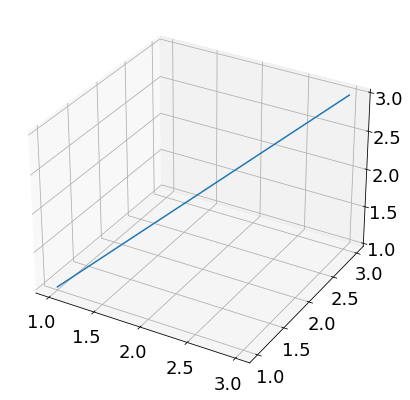

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=[1,2,3]
y=[1,2,3]
z=[1,2,3]
ax.plot(x,y,z)
plt.show()



In [4]:
def load_data(name, carpeta,x="TIME", y="CH1", x_new="t",y_new="V"):
    p="homodina/{}".format(carpeta)
    data=pd.read_csv("{}/{}.csv".format(p,name),skiprows=14, usecols=[x, y])
    data.rename(columns={x:x_new,
                        y:y_new}, inplace=True)
    return data

In [5]:
datos=load_data("tek0003CH1","vacio")
len(datos)

10000

In [11]:
def kde(datos):
    gkde_obj = stats.gaussian_kde(datos["V"])
    x_values=np.linspace(np.min(datos["V"]), np.max(datos["V"]),1000)
    density=gkde_obj.evaluate(x_values)
    return x_values, density

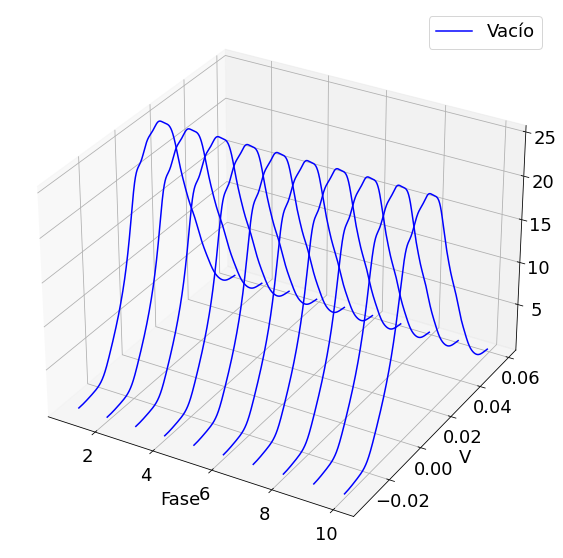

In [28]:
y_values, density=kde(datos)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

datos=load_data("tek000{}CH1".format("3"),"vacio")
x=np.ones(len(y_values))
ax.plot(x,y_values, density, c="blue", label="Vacío")
for i in range(4,13):
    if i <10:
        datos=load_data("tek000{}CH1".format(i),"vacio")
    else: 
        datos=load_data("tek00{}CH1".format(i),"vacio")
    x=np.ones(len(y_values))*(i-2)
    ax.plot(x,y_values, density, c="blue")
"""
datos=load_data("tek00{}CH1".format(14),"dark_noise")
x=np.ones(len(y_values))
ax.plot(x,y_values, density, c="red", label="Vacío")
for i in range(15,24):
    datos=load_data("tek00{}CH1".format(i),"dark_noise")
    x=np.ones(len(y_values))*(i-13)
    ax.plot(x,y_values, density, c="red")    
"""
ax.set_xlabel("Fase")
ax.set_ylabel("V")
plt.legend()
plt.show()
